In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

dataset = pd.read_csv('ecoli.csv')
dataset = shuffle(dataset)

dataset.head()

,NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
173,KGTP_ECOLI,0.45,0.40,0.48,0.5,0.61,0.74,0.77,im
157,DHG_ECOLI,0.84,0.44,0.48,0.5,0.48,0.71,0.74,im
10,ASG1_ECOLI,0.42,0.24,0.48,0.5,0.57,0.27,0.37,cp
159,DHSD_ECOLI,0.54,0.49,0.48,0.5,0.40,0.87,0.88,im
219,EMRB_ECOLI,0.71,0.52,0.48,0.5,0.64,1.00,0.99,im


In [2]:
dataset.shape

(220, 9)

In [3]:
# Deleting columns
dataset = dataset.drop(columns="NAME")
dataset = dataset.drop(columns="LIP")
dataset = dataset.drop(columns="CHG")

print(dataset['SITE'].unique())
print("Number of rows and columns:", dataset.shape)

dataset.head()

['im' 'cp']
Number of rows and columns: (220, 6)


,MCG,GVH,AAC,ALM1,ALM2,SITE
173,0.45,0.40,0.61,0.74,0.77,im
157,0.84,0.44,0.48,0.71,0.74,im
10,0.42,0.24,0.57,0.27,0.37,cp
159,0.54,0.49,0.40,0.87,0.88,im
219,0.71,0.52,0.64,1.00,0.99,im


In [4]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(dataset['SITE'])
dataset['SITE'] = le.transform(dataset['SITE'])

#How did the label encoder map the targets?
targets = ['cp', 'im']
map1 = le.transform(targets)

mapping = pd.DataFrame(map1,targets)
mapping

,0
cp,0
im,1


In [5]:
dataset.head()

,MCG,GVH,AAC,ALM1,ALM2,SITE
173,0.45,0.40,0.61,0.74,0.77,1
157,0.84,0.44,0.48,0.71,0.74,1
10,0.42,0.24,0.57,0.27,0.37,0
159,0.54,0.49,0.40,0.87,0.88,1
219,0.71,0.52,0.64,1.00,0.99,1


In [6]:
# Separating X and y from original dataframe

X = dataset.iloc[:,0:5]
y = dataset.iloc[:,5]

X.head()

,MCG,GVH,AAC,ALM1,ALM2
173,0.45,0.40,0.61,0.74,0.77
157,0.84,0.44,0.48,0.71,0.74
10,0.42,0.24,0.57,0.27,0.37
159,0.54,0.49,0.40,0.87,0.88
219,0.71,0.52,0.64,1.00,0.99


In [7]:
y.head()

173    1
157    1
10     0
159    1
219    1
Name: SITE, dtype: int32

In [8]:
# Split dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(176, 5) (176,)
(44, 5) (44,)


In [10]:
# Feature scaling using Standard scaler for "X"

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.astype(np.float64))
X_test = scaler.fit_transform(X_test.astype(np.float64))

In [11]:
print(dataset)

      MCG   GVH   AAC  ALM1  ALM2  SITE
173  0.45  0.40  0.61  0.74  0.77     1
157  0.84  0.44  0.48  0.71  0.74     1
10   0.42  0.24  0.57  0.27  0.37     0
159  0.54  0.49  0.40  0.87  0.88     1
219  0.71  0.52  0.64  1.00  0.99     1
..    ...   ...   ...   ...   ...   ...
204  0.31  0.44  0.50  0.79  0.82     1
27   0.21  0.51  0.50  0.32  0.41     0
139  0.22  0.34  0.42  0.29  0.39     0
202  0.39  0.41  0.52  0.72  0.75     1
215  0.10  0.49  0.41  0.67  0.21     1

[220 rows x 6 columns]


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of layers:  4
Number of outputs:  2
Train accuracy:  0.9943181818181818  test accuracy: 0.9772727272727273


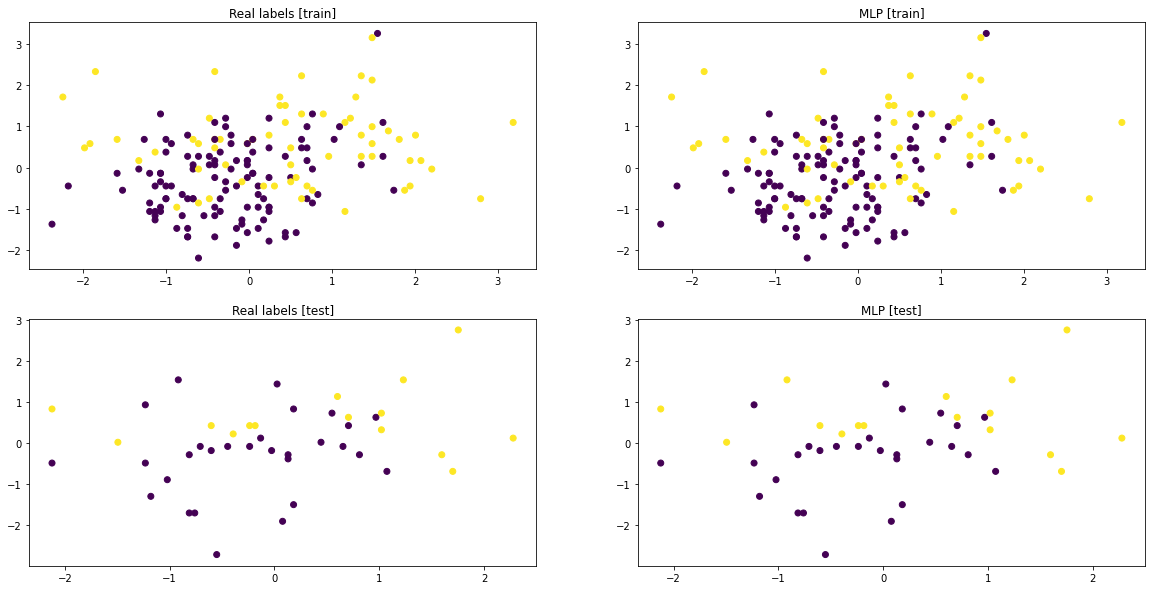

In [12]:
# MLP using sklearn

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

y_train_OneHot = np.eye(2)[y_train]
y_test_OneHot = np.eye(2)[y_test]

clf = MLPClassifier(activation='relu', alpha=1, batch_size='auto', hidden_layer_sizes=(10,15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, random_state= 1, shuffle=True, solver='lbfgs')

clf.fit(X_train, y_train_OneHot)
print("Number of layers: ", clf.n_layers_)
print("Number of outputs: ", clf.n_outputs_)

h_train_pred = np.argmax(clf.predict(X_train), axis=1)
h_test_pred = np.argmax(clf.predict(X_test), axis=1)

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title("Real labels [train]")
plt.subplot(2, 2, 2)
plt.scatter(X_train[:,0], X_train[:,1], c=h_train_pred)
plt.title("MLP [train]")
plt.subplot(2, 2, 3)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.title("Real labels [test]")
plt.subplot(2, 2, 4)
plt.scatter(X_test[:,0], X_test[:,1], c=h_test_pred)
plt.title("MLP [test]");

print("Train accuracy: ", clf.score(X_train, y_train_OneHot), " test accuracy:", clf.score(X_test,y_test_OneHot))

In [13]:
# MLP using Keras

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

model = Sequential()
model.add(Dense(100,input_dim=5,activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
# Fit the model on the training data
history = model.fit(X_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 511us/step - loss: 0.5879 - accuracy: 0.6705
Epoch 2/100
176/176 [==============================] - 0s 528us/step - loss: 0.3417 - accuracy: 0.9148
Epoch 3/100
176/176 [==============================] - 0s 523us/step - loss: 0.2111 - accuracy: 0.9602
Epoch 4/100
176/176 [==============================] - 0s 534us/step - loss: 0.1606 - accuracy: 0.9545
Epoch 5/100
176/176 [==============================] - 0s 523us/step - loss: 0.1343 - accuracy: 0.9489
Epoch 6/100
176/176 [==============================] - 0s 517us/step - loss: 0.1156 - accuracy: 0.9659
Epoch 7/100
176/176 [==============================] - 0s 523us/step - loss: 0.0985 - accuracy: 0.9773
Epoch 8/100
176/176 [==============================] - 0s 511us/step - loss: 0.0799 - accuracy: 0.9830
Epoch 9/100
176/176 [==============================] - 0s 511us/step - loss: 0.0801 - accuracy: 0.9659
Epoch 10/100
176/176 [==============================] - 0s 517us/step - l

176/176 [==============================] - 0s 500us/step - loss: 0.0420 - accuracy: 0.9886
Epoch 80/100
176/176 [==============================] - 0s 523us/step - loss: 0.0443 - accuracy: 0.9830
Epoch 81/100
176/176 [==============================] - 0s 500us/step - loss: 0.0418 - accuracy: 0.9830
Epoch 82/100
176/176 [==============================] - 0s 517us/step - loss: 0.0430 - accuracy: 0.9886
Epoch 83/100
176/176 [==============================] - 0s 517us/step - loss: 0.0424 - accuracy: 0.9886
Epoch 84/100
176/176 [==============================] - 0s 506us/step - loss: 0.0416 - accuracy: 0.9886
Epoch 85/100
176/176 [==============================] - 0s 494us/step - loss: 0.0424 - accuracy: 0.9886
Epoch 86/100
176/176 [==============================] - 0s 500us/step - loss: 0.0418 - accuracy: 0.9886
Epoch 87/100
176/176 [==============================] - 0s 540us/step - loss: 0.0411 - accuracy: 0.9830
Epoch 88/100
176/176 [==============================] - 0s 511us/step - loss:

In [15]:
# Evaluating the model on the test data
loss,accuracy = model.evaluate(X_test, y_test, batch_size=1)
print("\nLoss: ",loss*100)
print("Accuracy: ",accuracy*100)

44/44 [==============================] - 0s 523us/step - loss: 0.1135 - accuracy: 0.9773

Loss:  11.354253441095352
Accuracy:  97.72727489471436


In [16]:
probabilities = model.predict(X_test)
predictions = [float(str(x[0])) for x in probabilities]
accuracy = np.mean(predictions)
print("Prediction Accuracy:",accuracy*100)

Prediction Accuracy: 36.93361550870454
